In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv('./data/SMSSpamCollection', delimiter='\t', header=None, names=['spam', 'message'])
df.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['spam'] = df['spam'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


0    4825
1     747
Name: spam, dtype: int64


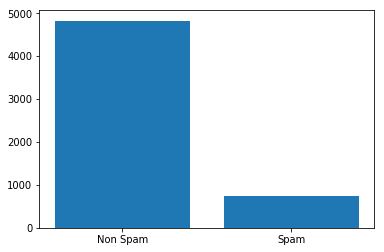

In [6]:
print(df['spam'].value_counts())
objects = ('Non Spam', 'Spam')

plt.bar(range(len(objects)), df['spam'].value_counts(), align="center")
plt.xticks(range(len(objects)), objects)
plt.show()

### Split the data 

In [7]:
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'],df['spam'])
# y_train

In [8]:
# objects = ('Non Spam', 'Spam')

# plt.bar(range(len(objects)), y_train.value_counts(), align="center")
# plt.xticks(range(len(objects)), objects)
# plt.ylim((0, 5000))
# plt.title("Spam count in training data")
# plt.show()

# plt.bar(range(len(objects)), y_test.value_counts(), align="center")
# plt.xticks(range(len(objects)), objects)
# plt.ylim((0, 5000))
# plt.title("Spam count in Test data")
# plt.show()

#### Obtaining equal split of spam & non-spam in Training data

800 800 4772 4772


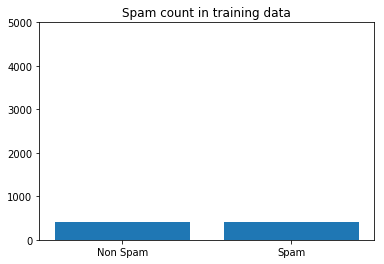

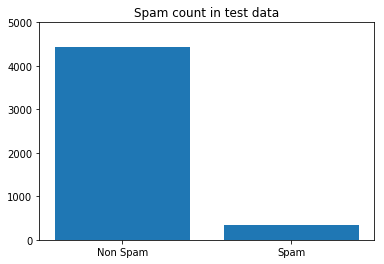

In [10]:
# X_raw_spam = X_train_raw[X_train_raw['spam'] == 1]
# X_raw_nonspam = X_train_raw[X_train_raw['spam'] == 0]

# y_raw_spam = y_train[y_train['spam'] == 1]
# y_raw_nonspam = y_train[y_train['spam'] == 0]

# print(y_test.value_counts())
# print(y_train.value_counts())

# X_train_raw = pd.concat([X_raw_spam, X_raw_nonspam.iloc[0:len(X_raw_spam)]])
# y_train_raw = pd.concat([y_raw_spam, y_raw_nonspam.iloc[0:len(X_raw_spam)]])
# print(len(X_raw_spam), len(X_raw_nonspam), len(y_raw_spam), len(y_raw_nonspam))

raw_spam = df[df['spam'] == 1]
raw_nonspam = df[df['spam'] != 1]

splitval = 400
X_train_raw = pd.concat([raw_spam['message'].iloc[0:splitval], raw_nonspam['message'].iloc[0:splitval]])
y_train = pd.concat([raw_spam['spam'].iloc[0:splitval], raw_nonspam['spam'].iloc[0:splitval]])
X_test_raw = pd.concat([raw_spam['message'].iloc[splitval:], raw_nonspam['message'].iloc[splitval:]])
y_test = pd.concat([raw_spam['spam'].iloc[splitval:], raw_nonspam['spam'].iloc[splitval:]])

print(len(X_train_raw), len(y_train), len(X_test_raw), len(y_test))
objects = ('Non Spam', 'Spam')

plt.bar(range(len(objects)), y_train.value_counts(), align="center")
plt.xticks(range(len(objects)), objects)
plt.ylim((0, 5000))
plt.title("Spam count in training data")
plt.show()

plt.bar(range(len(objects)), y_test.value_counts(), align="center")
plt.xticks(range(len(objects)), objects)
plt.ylim((0, 5000))
plt.title("Spam count in test data")
plt.show()

## Convert Raw message to a metric using TF-IDF 

Reference: https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Example_of_tf%E2%80%93idf

In [11]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

### Perform regression

In [12]:
classifier = LogisticRegression()
model = classifier.fit(X_train, y_train)
obtained_y = model.predict(X_test)
for i, prediction in enumerate(obtained_y):
    print("Prediction for ---{1}--- is {0}".format(prediction, X_test_raw.iloc[i]))
    print()

Prediction for ---You have 1 new message. Please call 08712400200.--- is 1

Prediction for ---We currently have a message awaiting your collection. To collect your message just call 08718723815.--- is 1

Prediction for ---URGENT! Your mobile was awarded a £1,500 Bonus Caller Prize on 27/6/03. Our final attempt 2 contact U! Call 08714714011--- is 1

Prediction for ---U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901--- is 1

Prediction for ---Do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?--- is 0

Prediction for ---Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth or DVD! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/4QF2--- is 1

Prediction for ---Reply to win £100 weekly! What professional sport does Tiger Woods play? Send STOP to 87239 to end service

Prediction for ---Did u find a sitter for kaitlyn? I was sick and slept all day yesterday.--- is 0

Prediction for ---Sorry man, accidentally left my phone on silent last night and didn't check it til I got up--- is 0

Prediction for ---Hey.. Something came up last min.. Think i wun be signing up tmr.. Hee--- is 0

Prediction for ---He's an adult and would learn from the experience. There's no real danger. I just dont like peeps using drugs they dont need. But no comment--- is 0

Prediction for ---Hey! There's veggie pizza... :/--- is 0

Prediction for ---Yun buying... But school got offer 2000 plus only...--- is 0

Prediction for ---You sure your neighbors didnt pick it up--- is 0

Prediction for ---K. I will sent it again--- is 0

Prediction for ---New Theory: Argument wins d SITUATION, but loses the PERSON. So dont argue with ur friends just.. . . . kick them &amp; say, I'm always correct.!--- is 0

Prediction for ---Well. Im computerless. Time to make some oreo truffles--- is 0

Pr


Prediction for ---HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GOOD TIME. WHEN ARE U BACK AND WHAT TIME IF U CAN GIVE ME A CALL AT HOME. JESS XX--- is 0

Prediction for ---Draw va?i dont think so:)--- is 0

Prediction for ---Dont pick up d call when something important is There to tell. Hrishi--- is 0

Prediction for ---Nothin comes to my mind. Ü help me buy hanger lor. Ur laptop not heavy?--- is 0

Prediction for ---&lt;#&gt; , that's all? Guess that's easy enough--- is 0

Prediction for ---We can make a baby in yo tho--- is 0

Prediction for ---Should I tell my friend not to come round til like  &lt;#&gt; ish?--- is 0

Prediction for ---Friendship poem: Dear O Dear U R Not Near But I Can Hear Dont Get Fear Live With Cheer No More Tear U R Always my Dear. Gud ni8--- is 0

Prediction for ---Still in the area of the restaurant. Ill try to come back soon--- is 0

Prediction for ---Aight that'll work, thanks--- is 0

Prediction for ---I have 2 sleeping bags, 1 blanket and paper and  phone

Prediction for ---Dear all, as we know  &lt;#&gt; th is the  &lt;#&gt; th birthday of our loving Gopalettan. We are planning to give a small gift on that day. Those who like to participate in that you are welcome. Please contact our admin team for more details--- is 0

Prediction for ---K..k...from tomorrow onwards started ah?--- is 0

Prediction for ---What u talking bout early morning? It's almost noon where your at!--- is 0

Prediction for ---Fine. Do you remember me.--- is 0

Prediction for ---Ok. How many should i buy.--- is 0

Prediction for ---Sounds good, keep me posted--- is 0

Prediction for ---Ok. So april. Cant wait--- is 0

Prediction for ---Boy you best get yo ass out here quick--- is 0

Prediction for ---Ay wana meet on sat?ü wkg on sat?--- is 0

Prediction for ---I'm now but have to wait till 2 for the bus to pick me.--- is 0

Prediction for ---Apart from the one i told you about yesterday?--- is 0

Prediction for ---Ok lor... But buy wat?--- is 0

Prediction for ---Som

Prediction for ---How long does it take to get it.--- is 0

Prediction for ---This is my number by vivek..--- is 0

Prediction for ---sorry brah, just finished the last of my exams, what up--- is 0

Prediction for ---I got arrested for possession at, I shit you not,  &lt;TIME&gt;  pm--- is 0

Prediction for ---You are right though. I can't give you the space you want and need. This is really starting to become an issue. I was going to suggest setting a definite move out--if i'm still there-- after greece. But maybe you are ready and should do it now.--- is 0

Prediction for ---Just normal only here :)--- is 0

Prediction for ---Please protect yourself from e-threats. SIB never asks for sensitive information like Passwords,ATM/SMS PIN thru email. Never share your password with anybody.--- is 1

Prediction for ---I miss you so much I'm so desparate I have recorded the message you left for me the other day and listen to it just to hear the sound of your voice. I love you--- is 0

Predicti


Prediction for ---I'm stuck in da middle of da row on da right hand side of da lt... --- is 0

Prediction for ---Have you laid your airtel line to rest?--- is 1

Prediction for ---Hi did u decide wot 2 get 4 his bday if not ill prob jus get him a voucher frm virgin or sumfing --- is 0

Prediction for ---Hey j! r u feeling any better, hopeSo hunny. i amnow feelin ill & ithink i may have tonsolitusaswell! damn iam layin in bedreal bored. lotsof luv me xxxx--- is 0

Prediction for ---And I don't plan on staying the night but I prolly won't be back til late--- is 0

Prediction for ---THANX 4 PUTTIN DA FONE DOWN ON ME!!--- is 0

Prediction for ---I need an 8th but I'm off campus atm, could I pick up in an hour or two?--- is 0

Prediction for ---Oh... Haha... Den we shld had went today too... Gee, nvm la... Kaiez, i dun mind goin jazz oso... Scared hiphop open cant catch up... --- is 0

Prediction for ---Been running but only managed 5 minutes and then needed oxygen! Might have to resort to

### Metrics for logical classifier

In [13]:
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test, obtained_y)
print(c)

[[4300  125]
 [  24  323]]


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, obtained_y))

0.9687761944677284


### Precision - fractions of correct predictions (can be easily seen from confusion matrix)
### Recall - fraction of spam messages truly identified as spam (Recall = 1, meaning no false predictions)
### Both are pretty much related


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, obtained_y))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      4425
          1       0.72      0.93      0.81       347

avg / total       0.97      0.97      0.97      4772



### ROC Curve - Recall vs Fallout (False positives / Total negatives)

In [16]:
# Find probabilities for each row. Return (N, 2) matrix. 
# The first one refers to the probability that the data belong to class 0, and the second one refers to the probability that the data belong to class 1

from sklearn.metrics import roc_curve, auc
p = classifier.predict_proba(X_test)
print(p)

# print(help(roc_curve))

# input is probabality estimate of the positive class, i.e 1
false_positive_rate, recall, thresholds = roc_curve(y_test, p[:, 1])
# print(false_positive_rate)
# print(recall)

[[0.2704188  0.7295812 ]
 [0.22208578 0.77791422]
 [0.13285374 0.86714626]
 ...
 [0.78749621 0.21250379]
 [0.70659765 0.29340235]
 [0.65709805 0.34290195]]


In [17]:
roc_auc = auc(false_positive_rate, recall)

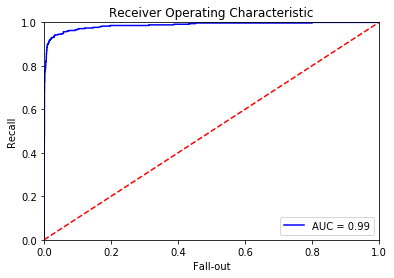

In [18]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--') # against a uniform random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, vectorizer.fit_transform(df['message']), df['spam'], cv=10)
print("Cross-validated scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))